# Installing PRAW package

In [1]:
# Install package praw which allows us to intract with Reddit API using Python
#!pip install praw  

# Authentication

In [3]:
import praw  # Importing praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" 
reddit = praw.Reddit(
    client_id="GHhEckF8DOx55ewNr89-1A", # My User ID
    client_secret="7eVs3ZjpkL_gosDaFHgL23fNUAr26w", # My User client Key
    user_agent=user_agent
)

# Importing required packages such as Pandas, Numpy, Re

In [4]:
import pandas as pd  # Importing Pandas as pd
import numpy as np   # Importing numpy as np
import re            # RegEx : Regular expression

# Get Trending Topic from your Subreddit 

In [5]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("war").hot(limit=None): # Using Trending Topic as war
    print(submission.title)# Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

A Russian recovery vehicle and BTR got destroyed by Ukrainian FPV drones also a logistic vehicle, a BMP with soldiers on top got hit and a MTLB burned down
1ayu5kk
Syae76
1708780153.0
46
0.87
https://v.redd.it/5wtbluyo8jkc1
0


# Get total comment in Subreddit

In [6]:
headlines = set()
for submission in reddit.subreddit("war").hot(limit=None): # Retreving the tittle of hot posts in war subreddit.
    headlines.add(submission.title)
print(len(headlines)) # Printing the no of Unique Headlines

988


# Creating a DataFrame

In [7]:
#Create a dataframe from the scrapped data 
war_df = pd.DataFrame(headlines)
war_df.head() # Printing the top Five Rows

,0
0,"How are people in countries like UK, USA or Au..."
1,Photographs of the Mayor of Nikopol who was ki...
2,Predictions?
3,Syria: Drone Attack Kills Six US-Backed Kurdis...
4,Ukrainian FPV drone destroying a Russian BMP


# Printing the Top Five Rows

In [8]:
war_df.head() # Printing the Top Five Rows

,0
0,"How are people in countries like UK, USA or Au..."
1,Photographs of the Mayor of Nikopol who was ki...
2,Predictions?
3,Syria: Drone Attack Kills Six US-Backed Kurdis...
4,Ukrainian FPV drone destroying a Russian BMP


# Adding Column Names

In [9]:
war_df.columns # Printing the Column Names.

RangeIndex(start=0, stop=1, step=1)

In [10]:
war_df.columns = ['Titles'] # Adding Column Names

#  Printing top Five Rows

In [11]:
war_df.head() # Printing top Five Rows

,Titles
0,"How are people in countries like UK, USA or Au..."
1,Photographs of the Mayor of Nikopol who was ki...
2,Predictions?
3,Syria: Drone Attack Kills Six US-Backed Kurdis...
4,Ukrainian FPV drone destroying a Russian BMP


# Checking For Duplictes

In [12]:
war_df.Titles.duplicated().sum()   # Printing the Sum of Duplicates.

0

# Cleaning the text

In [13]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
war_df["Titles"]= war_df["Titles"].apply(cleanTxt)

#Show the clean text
war_df.head()

,Titles
0,"How are people in countries like UK, USA or Au..."
1,Photographs of the Mayor of Nikopol who was ki...
2,Predictions?
3,Syria Drone Attack Kills Six US-Backed Kurdish...
4,Ukrainian FPV drone destroying a Russian BMP


# Remove emoji & Unicode from the reddit data

In [14]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
war_df["Titles"]= war_df["Titles"].apply(remove_emoji)

#Show the clean text
war_df.head()

,Titles
0,"How are people in countries like UK, USA or Au..."
1,Photographs of the Mayor of Nikopol who was ki...
2,Predictions?
3,Syria Drone Attack Kills Six US-Backed Kurdish...
4,Ukrainian FPV drone destroying a Russian BMP


# Installing Textblob

In [15]:
#!pip install textblob

# Importing TextBlob

In [16]:
from textblob import TextBlob ## Importing TextBlob
from wordcloud import WordCloud, STOPWORDS  

# Creating a function to get the subjectivity

In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
war_df['Subjectivity'] = war_df['Titles'].apply(getSubjectivity)
war_df['Polarity'] = war_df['Titles'].apply(getPolarity)

#Now display data
war_df.head()

,Titles,Subjectivity,Polarity
0,"How are people in countries like UK, USA or Au...",1.0,-0.8
1,Photographs of the Mayor of Nikopol who was ki...,0.0,-0.2
2,Predictions?,0.0,0.0
3,Syria Drone Attack Kills Six US-Backed Kurdish...,0.0,0.0
4,Ukrainian FPV drone destroying a Russian BMP,0.0,-0.1


# Grouping the range of Polarity 

In [18]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
war_df["Insight"] = war_df["Polarity"].apply(getInsight)

war_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"How are people in countries like UK, USA or Au...",1.000000,-0.800000,Negative
1,Photographs of the Mayor of Nikopol who was ki...,0.000000,-0.200000,Negative
2,Predictions?,0.000000,0.000000,Neutral
3,Syria Drone Attack Kills Six US-Backed Kurdish...,0.000000,0.000000,Neutral
4,Ukrainian FPV drone destroying a Russian BMP,0.000000,-0.100000,Negative
5,IDF Reservist who Pushed 2 Hamas Militants Rec...,0.000000,0.000000,Neutral
6,Midnight Drone Drops on ZSU Forces,0.000000,0.000000,Neutral
7,Iran Supplies Sudan Army With Drones As Civil ...,0.000000,0.000000,Neutral
8,Man films video of unguided bomb being dropped...,0.000000,0.000000,Neutral
9,Group of Boats blown up by Mortars,0.000000,0.000000,Neutral


# Data Visualization

In [19]:
import seaborn as sns # Importing seaborn Package
import warnings 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.style.use('fivethirtyeight')

# Plot the values count of sentiment

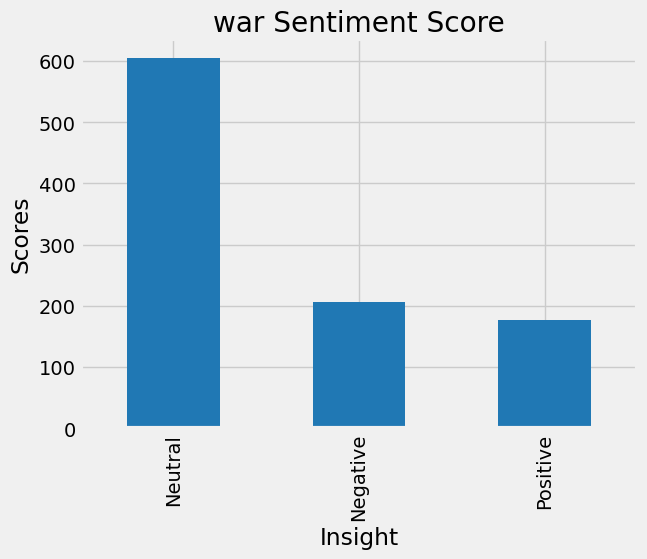

In [20]:
#Plot the values count of sentiment
plt.title("war Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (10,8) # Figure Size
war_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

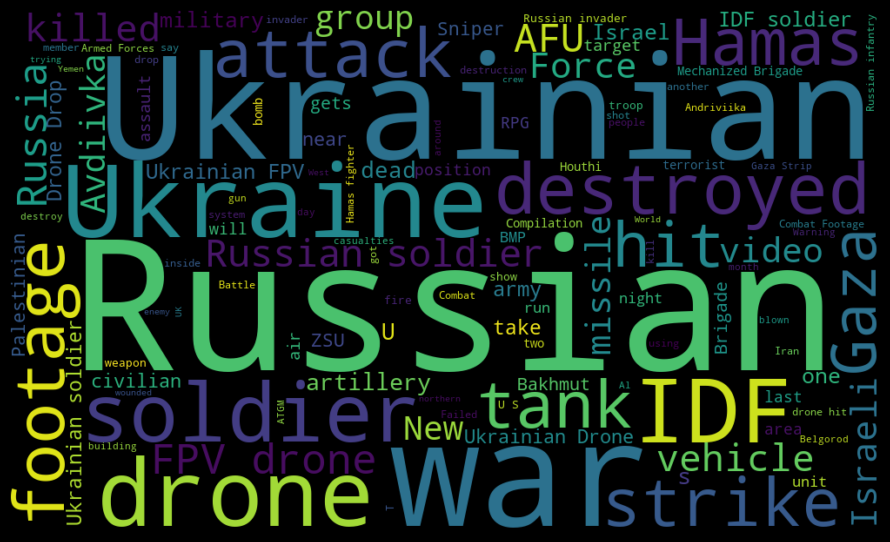

In [21]:
text = ' '.join( [twts for twts in war_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");